### Activity Recognition system based on Multisensor data fusion


In this project , I have studied various methods for classification of data on the time series dataset.  <br>

The methods are listed below: <br>
1) Binary Classifiation using Logistic Regression  <br>
2) Binary Classifiation using L-1 penalized Logistic Regression  <br>
3) Multi-class Classifiation using Multinomial Logistic Regression  <br>
4) Multi-class Classifiation using Multinomial Naive Bayes  <br>
5) Multi-class Classifiation using Gaussian Naive Bayes  <br>

In this problem, we classify the activities of humans based on time series obtained by a Wireless Sensor Network. 
The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

The data is downloaded from : https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29

Feature engineering and Extraction is used in this project and the various machine learning models are analysed and compared.

In [5]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp
%matplotlib inline


### Feature Extraction of time-domain features

In time-series classification the time-domain features used are-
</br>
1. Maximum value </br>
2. Co-efficient of Skewness </br>
3. Range </br>
4. Inter-quartile range </br>
5. Peaks in a time series </br>
6. Median </br>
7. 10th percentile </br>
8. Mean value </br>
9. Minimum value </br>
10. Kurtosis </br>

### Extracting the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance.

In [44]:
activities=["bending1","bending2","cycling","lying","sitting","standing","walking"]
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
extract=["min","max","mean","median","std_dev","first_quar","third_quar"]
table_index=[]
for f in features:
    for p in range(len(extract)):
        table_index.append((extract[p]+"_"+f))
#table_index.append('activity')
table_frame=pd.DataFrame(columns=table_index) 

### Extracting the time domain features for all 6 time series

In [45]:
new_list=[]
for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM/{0}".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4,usecols=range(1,7))
        ext=[]
        ext1=[]
        for f in features:
            ext.append(np.min(df[f]))
            ext.append(np.max(df[f]))
            ext.append(np.mean(df[f]))
            ext.append(np.median(df[f]))
            ext.append(df[f].std())
            ext.append(df[f].quantile(0.25))
            ext.append(df[f].quantile(0.75))
        #ext.append(activity)
        new_list.append(ext)
        
new_dataset=pd.DataFrame(new_list,columns=table_index)
print(new_dataset.head())
      


   min_avg_rss12  max_avg_rss12  mean_avg_rss12  median_avg_rss12  \
0          37.25          45.00       40.624792             40.50   
1          38.00          45.67       42.812812             42.50   
2          35.00          47.40       43.954500             44.33   
3          33.00          47.75       42.179813             43.50   
4          33.00          45.75       41.678063             41.75   

   std_dev_avg_rss12  first_quar_avg_rss12  third_quar_avg_rss12  \
0           1.476967                 39.25                 42.00   
1           1.435550                 42.00                 43.67   
2           1.558835                 43.00                 45.00   
3           3.670666                 39.15                 45.00   
4           2.243490                 41.33                 42.75   

   min_var_rss12  max_var_rss12  mean_var_rss12          ...           \
0            0.0           1.30        0.358604          ...            
1            0.0           1.2

### Estimating the standard deviation of each of the time-domain features extracted from the data.

In [4]:
n_iterations = 1000
std_deviation= new_dataset.describe()[new_dataset.describe().index == 'std']
std_deviation=std_deviation.T

std_deviation

,std
min_avg_rss12,9.569975
max_avg_rss12,4.394362
mean_avg_rss12,5.335718
median_avg_rss12,5.440054
std_dev_avg_rss12,1.772153
first_quar_avg_rss12,6.153590
third_quar_avg_rss12,5.138925
min_var_rss12,0.000000
max_var_rss12,5.062729
mean_var_rss12,1.574164


### Then, using Python’s bootstrapped method to build a 90% bootstrap confidence interval for the standard deviation of each feature.

#### Bootstrapping over the dataset

In [5]:
lower={}
upper={}
from sklearn.utils import resample
for i in new_dataset.columns.tolist():
    bootstrap = []
    for p in range(n_iterations):
        sample = resample(new_dataset[i])
        bootstrap.append(np.std(sample))
    bootstrap.sort()
    lower[i]=bootstrap[49]  
    upper[i]=bootstrap[949]  

In [6]:
prin
std_deviation["Confidence lower bound"]=pd.Series(lower)
std_deviation["Confidence upper bound"]=pd.Series(upper)
std_deviation

,std,Confidence lower bound,Confidence upper bound
min_avg_rss12,9.569975,8.276315,10.809425
max_avg_rss12,4.394362,3.264599,5.281532
mean_avg_rss12,5.335718,4.661433,5.865653
median_avg_rss12,5.440054,4.722125,5.942180
std_dev_avg_rss12,1.772153,1.565369,1.932216
first_quar_avg_rss12,6.153590,5.518130,6.617273
third_quar_avg_rss12,5.138925,4.292295,5.756055
min_var_rss12,0.000000,0.000000,0.000000
max_var_rss12,5.062729,4.588949,5.394194
mean_var_rss12,1.574164,1.388562,1.692568


### Selecting the three most important time-domain features :
#### Median: For data which is not much changing across the column, median is a good feature for getting central tendency
#### Mean : It gives the average value of the time-series
#### Max: It gives the peak values of the time series 

### Binary Classification Using Logistic Regression
#### Classifying to Activities to Bending and Non-Bending

#### Creating train and test set

In [4]:
table_activity_index=table_index
table_activity_index.append('activity')
new_list=[]
for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4,usecols=range(1,7))
        ext=[]
        ext1=[]
        for f in features:
            ext.append(np.min(df[f]))
            ext.append(np.max(df[f]))
            ext.append(np.mean(df[f]))
            ext.append(np.median(df[f]))
            ext.append(df[f].std())
            ext.append(df[f].quantile(0.25))
            ext.append(df[f].quantile(0.75))
        ext.append(activity)
        new_list.append(ext)
        
train_set=pd.DataFrame(new_list,columns=table_index)
#train_set


In [8]:
new_list=[]
for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/test".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4,usecols=range(1,7))
        ext=[]
        for f in features:
            ext.append(np.min(df[f]))
            ext.append(np.max(df[f]))
            ext.append(np.mean(df[f]))
            ext.append(np.median(df[f]))
            ext.append(df[f].std())
            ext.append(df[f].quantile(0.25))
            ext.append(df[f].quantile(0.75))
        ext.append(activity)
        new_list.append(ext)
        
test_set=pd.DataFrame(new_list,columns=table_index)
#test_set

,min_avg_rss12,max_avg_rss12,mean_avg_rss12,median_avg_rss12,std_dev_avg_rss12,first_quar_avg_rss12,third_quar_avg_rss12,min_var_rss12,max_var_rss12,mean_var_rss12,...,first_quar_avg_rss23,third_quar_avg_rss23,min_var_rss23,max_var_rss23,mean_var_rss23,median_var_rss23,std_dev_var_rss23,first_quar_var_rss23,third_quar_var_rss23,activity
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,bending1
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,bending1
2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,bending2
3,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300,bending2
4,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,cycling
5,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080688,...,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770,cycling
6,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150,cycling
7,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363688,...,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,lying
8,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,2.0000,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940,lying
9,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,4.6700,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830,lying


In [3]:
train_set.activity.replace(['bending1', 'bending2',"cycling","lying","sitting","standing","walking"], ['bending','bending','non-bending','non-bending','non-bending','non-bending','non-bending'], inplace=True)

test_set.activity.replace(['bending1', 'bending2',"cycling","lying","sitting","standing","walking"], ['bending','bending','non-bending','non-bending','non-bending','non-bending','non-bending'], inplace=True)
#train_set


In [10]:
train_subset_columns1 = [col for col in train_set.columns.tolist() if col.endswith('avg_rss12') or col.endswith('var_rss12') or col.endswith('var_rss23') or col == 'activity']
train_subset=train_set[train_subset_columns1]
train_subset_columns2= [col for col in train_subset.columns.tolist() if col.startswith('max') or col.startswith('mean') or col.startswith('median') or col == 'activity']
train_subset=train_subset[train_subset_columns2]
#train_subset.columns.tolist()

['max_avg_rss12',
 'mean_avg_rss12',
 'median_avg_rss12',
 'max_var_rss12',
 'mean_var_rss12',
 'median_var_rss12',
 'max_var_rss23',
 'mean_var_rss23',
 'median_var_rss23',
 'activity']

### Plotting ScatterPlots to get an idea about the data

In [11]:
scatter_plot=pd.DataFrame()
a=0
b=0
for cols in train_subset.columns.tolist():
    if cols!='activity':
        for i in range(0,69):
            scatter_plot.loc[a,'feature_num']=str(b+1)
            scatter_plot.loc[a,'val']=train_set.loc[i,cols]
            if train_set.loc[i,'activity']=='bending':
                scatter_plot.loc[a,'activity']=1
            else:
                scatter_plot.loc[a,'activity']=0
            a=a+1
        b=b+1
            
scatter_plot



,feature_num,val,activity
0,1,47.400,1.0
1,1,47.750,1.0
2,1,45.750,1.0
3,1,48.000,1.0
4,1,48.000,1.0
5,1,50.000,1.0
6,1,33.000,1.0
7,1,45.500,1.0
8,1,47.500,1.0
9,1,45.000,0.0


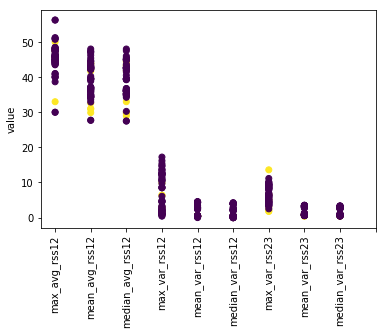

In [12]:
plt.scatter(scatter_plot['feature_num'],scatter_plot['val'],c=scatter_plot['activity'])
plt.plot()
#plt.xlabel('features')
label=["max_avg_rss12","mean_avg_rss12","median_avg_rss12","max_var_rss12","mean_var_rss12","median_var_rss12","max_var_rss23","mean_var_rss23","median_var_rss23"]
plt.xticks(range(10),label,rotation='vertical')
plt.ylabel('value')
plt.show()

### Inference :
#### Yellow depicts Activity-Bending 
#### Blue depicts Activity-Non-Bending 
#### Bending has very less number of samples whereas Non-bending has majority of samples. The scatterplot shows class-imbalance.

### Breaking each time series in the training set into two (approximately) equal length time series. 
#### Observation: After breaking the data into two, the scatterplots of different classes look more seperable.

In [75]:
imp_features=['avg_rss12','var_rss12','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
for f in imp_features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,2)
        #print(df_split)
        for splits in df_split:
            for f in imp_features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            if activity=='bending1' or activity=='bending2':
                new_dict['activity'].append('bending')
            else:
                new_dict['activity'].append('not-bending')
            
new_train=pd.DataFrame(new_dict)
new_train.shape

(138, 10)

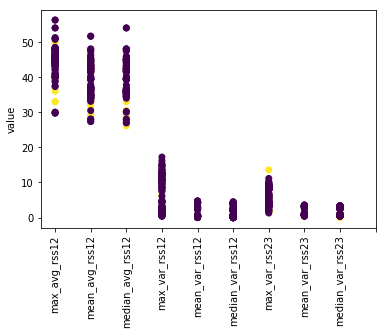

In [14]:
scatter_plot=pd.DataFrame()
a=0
b=0
for cols in new_train.columns.tolist():
    if cols!='activity':
        for i in range(0,138):
            scatter_plot.loc[a,'feature_num']=str(b+1)
            scatter_plot.loc[a,'val']=new_train.loc[i,cols]
            if new_train.loc[i,'activity']=='bending':
                scatter_plot.loc[a,'activity']=1
            else:
                scatter_plot.loc[a,'activity']=0
            a=a+1
        b=b+1
            
scatter_plot
plt.scatter(scatter_plot['feature_num'],scatter_plot['val'],c=scatter_plot['activity'])
plt.plot()
#plt.xlabel('features')
label=["max_avg_rss12","mean_avg_rss12","median_avg_rss12","max_var_rss12","mean_var_rss12","median_var_rss12","max_var_rss23","mean_var_rss23","median_var_rss23"]
plt.xticks(range(10),label,rotation='vertical')
plt.ylabel('value')
plt.show()

#### Breaking each time series in the training set into l=(1,2...20) time series of approximately equal length and using logistic regression to solve the binary classification problem, using time-domain features. Using 5-fold cross-validation to determine the best value of l.
#### Using stratified cross validation to compensate for the problem of class imbalance, as some of the folds may not have any instances of the rare class.

#### Using feature ranking with recursive feature elimination and cross-validated selection of the best number of features. (Function used: RFECV)


In [15]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression as log_reg
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score


features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']

In [16]:

acc_final=[]
auc_final=[]
feat_final=[]
train_in=[]
test_in=[]

L=range(1,21)
for l in range(1,21):
    new_dict={}
    for f in features:
        for e in imp_extract:
            new_dict[e+"_"+f] = []
    new_dict['activity'] = []

    for activity in activities:
        mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
        for fname in os.listdir(mypath):
            df=pd.read_csv(mypath+'/'+fname,skiprows=4)
            #print(df)
            df_split=np.array_split(df,l)
            #print(df_split)
            for splits in df_split:
                for f in features:
                    new_dict["max"+"_"+f].append(np.max(splits[f]))
                    new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                    new_dict["median"+"_"+f].append(np.median(splits[f]))
                if activity=='bending1' or activity=='bending2':
                    new_dict['activity'].append(1)
                else:
                    new_dict['activity'].append(0)

    new_train=pd.DataFrame(new_dict)
    data_X=new_train.loc[:,new_train.columns!='activity']
    data_y=new_train['activity']

    st_kfcv = StratifiedKFold(n_splits=5,shuffle=False)
    area_uc=[]
    acc=[]
    ret_feat=[]
    tr_index=[]
    vl_index=[]
    
    for train_index,val_index in st_kfcv.split(data_X,data_y):
        X_train, X_val = data_X.iloc[train_index.tolist(),:], data_X.iloc[val_index.tolist(),:]
        y_train, y_val = data_y[train_index.tolist()], data_y[val_index.tolist()]
    
        regressor = log_reg()
        rfecv =   RFECV(estimator=regressor, cv=StratifiedKFold(5), scoring='accuracy')
        best_features = rfecv.fit(X_train,y_train).ranking_ == 1

        regressor1 = log_reg()
        X_train = X_train.loc[:,best_features]
        X_val = X_val.loc[:,best_features]
        regressor1.fit(X_train,y_train)
        fpr,tpr,_=roc_curve(y_val,regressor1.predict(X_val))
        acc.append(regressor1.score(X_val,y_val))
        area_uc.append(auc(fpr, tpr))
        ret_feat.append(X_train.columns)
        tr_index.append(train_index)
        vl_index.append(val_index)
        
    acc_final.append(np.mean(acc))
    auc_final.append(np.mean(area_uc))
    q=np.argmax(area_uc)
    feat_final.append(ret_feat[q])
    train_in.append(tr_index[q])
    test_in.append(vl_index[q])


In [17]:
coef_values = pd.DataFrame({"L":L,"AUC":auc_final,"Accuracy":acc_final})
coef_values[['L','AUC','Accuracy']]

,L,AUC,Accuracy
0,1,0.966667,0.942857
1,2,0.858333,0.914021
2,3,0.819444,0.883391
3,4,0.868750,0.920000
4,5,0.771111,0.881159
5,6,0.830682,0.901058
6,7,0.857326,0.909085
7,8,0.857887,0.918296
8,9,0.848843,0.912903
9,10,0.826944,0.904348


In [18]:
best_features=feat_final[1].values
print("Best features : \n",best_features)

train_index=(train_in[1])
test_index=(test_in[1])


Best features : 
 ['mean_avg_rss12' 'max_var_rss12' 'mean_var_rss12' 'max_avg_rss13'
 'mean_avg_rss13' 'median_var_rss13' 'max_avg_rss23' 'mean_avg_rss23'
 'max_var_rss23']


### Inference
### Best L=1
###            Best Features 
 'mean_avg_rss12', 'max_var_rss12' ,'mean_var_rss12' 'max_avg_rss13','mean_avg_rss13', 'median_var_rss13' ,'max_avg_rss23' 'mean_avg_rss23','max_var_rss23'


### Confusion matrix ,ROC and AUC for classifier on train data.


Accuracy:
 1.0

Confusion Matrix :
 [[19  0]
 [ 0  2]]


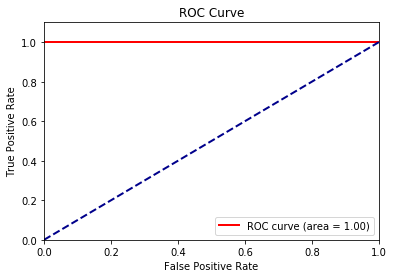

In [19]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
train_index=train_in[1]
test_index=test_in[1]
for f in features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,1)
        #print(df_split)
        for splits in df_split:
            for f in features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            if activity=='bending1' or activity=='bending2':
                new_dict['activity'].append('bending')
            else:
                new_dict['activity'].append('not-bending')
            
new_train=pd.DataFrame(new_dict)
data_X=new_train.loc[:,new_train.columns!='activity']
data_y=new_train['activity']
area_uc = []

data_X = data_X[best_features]

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=0) 
regressor = log_reg()
regressor = regressor.fit(X_train, y_train)
y_true=[]
y_pred=[]
acc=0

for y in y_test.tolist():
    if y=='bending':
        y_true.append(1)
    else:
        y_true.append(0)
for p in regressor.predict(X_test).tolist():
    if p=='bending':
        y_pred.append(1)
    else:
        y_pred.append(0)      

cm = metrics.confusion_matrix(y_true,y_pred)
acc=regressor.score(X_test,y_test)
print("\nAccuracy:\n",acc)
print("\nConfusion Matrix :\n",cm)
fpr, tpr, _ = roc_curve(y_true,y_pred)
area_uc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()
#print(fpr,tpr)
#print(y_true)

#### Best Features and  Regression co-efficient values associated with them

In [20]:
coef = pd.DataFrame({"Feature":best_features,"Co-efficient values":regressor.coef_[0].tolist()})
coef[['Feature','Co-efficient values']]

,Feature,Co-efficient values
0,mean_avg_rss12,0.550860
1,max_var_rss12,0.342922
2,mean_var_rss12,0.134122
3,max_avg_rss13,0.027537
4,mean_avg_rss13,0.210594
5,median_var_rss13,0.160376
6,max_avg_rss23,-0.457070
7,mean_avg_rss23,-0.680992
8,max_var_rss23,0.037650


#### Best Features and p-values associated with them

In [21]:
_,p=chi2(X_train,y_train)
coef_values = pd.DataFrame({"Feature":best_features,"P-values":p})
coef_values[['Feature','P-values']]

,Feature,P-values
0,mean_avg_rss12,5.004041e-01
1,max_var_rss12,1.766010e-03
2,mean_var_rss12,1.524376e-02
3,max_avg_rss13,4.948314e-02
4,mean_avg_rss13,1.396682e-01
5,median_var_rss13,3.894605e-02
6,max_avg_rss23,1.369210e-09
7,mean_avg_rss23,5.878163e-10
8,max_var_rss23,8.058217e-02


### Testing the classifier on the test set

#### Preparing the Test and train set

In [22]:
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
for f in features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,1)
        #print(df_split)
        for splits in df_split:
            for f in features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            if activity=='bending1' or activity=='bending2':
                new_dict['activity'].append('bending')
            else:
                new_dict['activity'].append('not-bending')
            
new_train=pd.DataFrame(new_dict)
#new_train= new_train.sample(frac=1,random_state=5).reset_index(drop=True)
data_X=new_train.loc[:,new_train.columns!='activity']
data_y=new_train['activity']

data_X = data_X[best_features]
train_X=data_X
train_y=data_y
#print(new_train)
#print(train_X)


In [23]:
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
for f in features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/test".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,1)
        #print(df_split)
        for splits in df_split:
            for f in features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            if activity=='bending1' or activity=='bending2':
                new_dict['activity'].append('bending')
            else:
                new_dict['activity'].append('not-bending')
            
new_test=pd.DataFrame(new_dict)

data_X=new_test.loc[:,new_test.columns!='activity']
test_X=data_X[best_features]
test_y=new_test['activity']


### Testing the classifier with best features extracted 


Confusion Matrix for Test data:
 [[15  0]
 [ 0  4]]

Area under curve for Test data:
 1.0

Accuracy:
 1.0


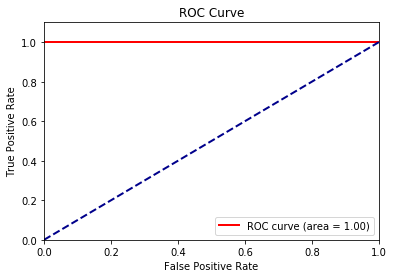

In [24]:
regressor = log_reg()
regressor = regressor.fit(train_X,train_y)
y_true=[]
y_pred=[]
area_uc=0
acc=0
for y in test_y.tolist():
    if y=='bending':
        y_true.append(1)
    else:
        y_true.append(0)
for p in regressor.predict(test_X).tolist():
    if p=='bending':
        y_pred.append(1)
    else:
        y_pred.append(0)    
        
cm = metrics.confusion_matrix(y_true,y_pred)
print("\nConfusion Matrix for Test data:\n",cm)
acc=regressor.score(test_X,test_y)
fpr, tpr, _ = roc_curve(y_true,y_pred)
area_uc = auc(fpr, tpr)

print("\nArea under curve for Test data:\n",area_uc)
print("\nAccuracy:\n",acc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Inference:
Both the test and cross-validation accuracy are 1.0. <br> <br>
Both model are working well. But since the minority class is less , both models can still be improved.

### Observation

The classes are not well separated. That is why when we cross validate using KFold ,we get errors as some classes get no samples at all.<br> <br>
To alleviate this,
I used the Stratified K-fold cross validation which takes care of the class imbalance. In bending and Non-bending , the majority class is Non-bending, due to this if the test set gets 1 out of 10 sample as bending, it will be classified as non-bending.But the accuracy and AUC will still be high. <br><br>
By shuffling the dataset and using Stratified K-fold I reduced the instability of logistic regression parameters.

### Building a logistic regression model based on case-control sampling and adjusting its parameters to deal with class-imbalance


Confusion Matrix for Test data:
 [[15  0]
 [ 0  4]]

Area under curve for Test data:
 1.0


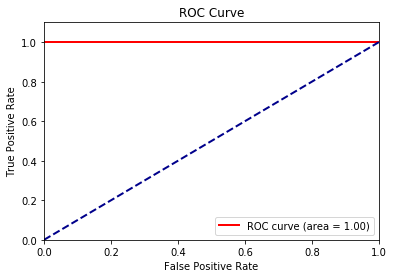

In [25]:
regressor = log_reg(class_weight='balanced')
regressor = regressor.fit(train_X,train_y)
y_true=[]
y_pred=[]
area_uc=0
for y in test_y.tolist():
    if y=='bending':
        y_true.append(1)
    else:
        y_true.append(0)
for p in regressor.predict(test_X).tolist():
    if p=='bending':
        y_pred.append(1)
    else:
        y_pred.append(0)    
        
cm = metrics.confusion_matrix(y_true,y_pred)
print("\nConfusion Matrix for Test data:\n",cm)
fpr, tpr, _ = roc_curve(y_true,y_pred)
area_uc = auc(fpr, tpr)
print("\nArea under curve for Test data:\n",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Binary Classification Using L1-penalized logistic regression
#### Here, we are cross-validating to get both the value of l and C- the penatly parameter


### Calculating the Best L for L1-penalized logistic regression

In [52]:
d={}
area_uc_all=[]
pen_weight_all=[]
acc_all=[]
from sklearn.linear_model import LogisticRegressionCV as log_regcv
from sklearn import preprocessing
mean_auc={}
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
for l in range(1,21):
    new_dict={}
    area_uc = []
    pen_weight=[]
    for f in features:
        for e in imp_extract:
            new_dict[e+"_"+f] = []
    new_dict['activity'] = []

    for activity in activities:
        mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
        for fname in os.listdir(mypath):
            df=pd.read_csv(mypath+'/'+fname,skiprows=4)
            #print(df)
            df_split=np.array_split(df,l)
            #print(df_split)
            for splits in df_split:
                for f in features:
                    new_dict["max"+"_"+f].append(np.max(splits[f]))
                    new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                    new_dict["median"+"_"+f].append(np.median(splits[f]))
                if activity=='bending1' or activity=='bending2':
                    new_dict['activity'].append('bending')
                else:
                    new_dict['activity'].append('not-bending')

    new_train=pd.DataFrame(new_dict)
    data_X=new_train.loc[:,new_train.columns!='activity']
    data_y=new_train['activity']
    acc=[]
    
    norm1=preprocessing.MinMaxScaler()
    norm=norm1.fit_transform(data_X.values)
    data_X=pd.DataFrame(norm,columns=data_X.columns)

    st_kfcv = StratifiedKFold(n_splits=5,shuffle=False)
 
    for train_index,val_index in st_kfcv.split(data_X,data_y):
        X_train, X_val = data_X.iloc[train_index.tolist(),:], data_X.iloc[val_index.tolist(),:]
        y_train, y_val = data_y[train_index.tolist()], data_y[val_index.tolist()]
    
            
        regressor = log_regcv(Cs=10,penalty='l1',solver='liblinear')
        regressor = regressor.fit(X_train, y_train)
        y_true=[]
        y_pred=[]
        for y in y_val.tolist():
            if y=='bending':
                y_true.append(1)
            else:
                y_true.append(0)
        for p in regressor.predict(X_val).tolist():
            if p=='bending':
                y_pred.append(1)
            else:
                y_pred.append(0)
        
        fpr, tpr, _ = roc_curve(y_true,y_pred)
        area_uc.append(auc(fpr, tpr))
        acc.append(regressor.score(X_val,y_val))
        pen_weight.append(regressor.C_)
    area_uc_all.append(area_uc)
    pen_weight_all.append(pen_weight)
    acc_all.append(acc)

In [53]:
l_values=[]
op_lam=[]
auc_pen=[]
acc_1=[]
for l in range(1,21):
    for i in range(1,6):
        l_values.append(l)
        auc_pen.append(area_uc_all[l-1][i-1])
        op_lam.append(float(pen_weight_all[l-1][i-1]))
        acc_1.append(acc_all[l-1][i-1])

In [54]:
coef_values = pd.DataFrame({"L":l_values,"Optimal lambda":op_lam,"AUC":auc_pen,"Accuracy":acc_1})
coef_values[['L','Optimal lambda','AUC',"Accuracy"]]

,L,Optimal lambda,AUC,Accuracy
0,1,2.782559,1.000000,1.000000
1,1,2.782559,0.750000,0.928571
2,1,21.544347,0.916667,0.857143
3,1,2.782559,0.750000,0.928571
4,1,21.544347,1.000000,1.000000
5,2,10000.000000,1.000000,1.000000
6,2,166.810054,0.750000,0.928571
7,2,21.544347,0.770833,0.785714
8,2,1291.549665,1.000000,1.000000
9,2,166.810054,0.666667,0.925926


### Best L for L-1 penalized is 1 with penalty=21.544347

### Creating the test set for L1 penalized Logistic Regression

In [55]:
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
for f in features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/test".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,1)
        #print(df_split)
        for splits in df_split:
            for f in features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            if activity=='bending1' or activity=='bending2':
                new_dict['activity'].append('bending')
            else:
                new_dict['activity'].append('not-bending')
            
new_test=pd.DataFrame(new_dict)


test_X=new_test.loc[:,new_test.columns!='activity']

test_y=new_test['activity']
X_train = new_train.loc[:,new_train.columns!='activity']
y_train = new_train['activity']


### Calculating p-values for L1-penalized Logistic Regression

In [68]:
_,p=chi2(X_train[best_features],y_train)
coef_values = pd.DataFrame({"P-values":p})
coef_values[['P-values']]

,P-values
0,3.677699e-03
1,1.689662e-71
2,4.629374e-35
3,2.005191e-12
4,1.347296e-16
5,2.479159e-21
6,5.028859e-127
7,7.351342e-198
8,1.060903e-40


### Using L1 Penalty=21.544347 with L=1 on test set

In [65]:
regressor1 = log_reg(penalty='l1',solver='liblinear',C=21.544347)
regressor1 = regressor1.fit(X_train, y_train)
y_true=[]
y_pred=[]
for y in test_y.tolist():
    if y=='bending':
        y_true.append(1)
    else:
        y_true.append(0)
y_pred1=regressor1.predict(test_X).tolist()
for y in y_pred1:
    if y=='bending':
        y_pred.append(1)
    else:
        y_pred.append(0)
cm = metrics.confusion_matrix(y_true,y_pred)
print("Confusion Matrix for the test set: ")
print(cm)
fpr, tpr, _ = roc_curve(y_true,y_pred)
print("\nAUC :",auc(fpr, tpr))

Confusion Matrix for the test set: 
[[15  0]
 [ 0  4]]

AUC : 1.0


### Comparison of  L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

The L-1 penalized model is easier to program and implement as we have to add just one regularization term to be added. <br><br>
The Area-under the curve for both the models on the test set is 1. From the p-values we can make out that L-1 penalized model performs much better than the model with backward variable selection.

## Multi-class Classification (The Realistic Case)


### Creating train and test Sets

In [79]:
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
for f in features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/test".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,1)
        #print(df_split)
        for splits in df_split:
            for f in features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            if activity=='bending1' or activity=='bending2':
                new_dict['activity'].append('bending')
            else:
                new_dict['activity'].append('not-bending')
            
new_test=pd.DataFrame(new_dict)


test_X=new_test.loc[:,new_test.columns!='activity']

test_y=new_test['activity']



### Building an L1-penalized multinomial regression model

In [ ]:
d={}
area_uc_all=[]
pen_weight_all=[]
acc_all=[]
auc1_all=[]
from sklearn.linear_model import LogisticRegressionCV as log_regcv
from sklearn import preprocessing
mean_auc={}
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
activities=["bending1","bending2","cycling","lying","sitting","standing","walking"]

for l in range(1,21):
    new_dict={}
    area_uc = []
    pen_weight=[]
    for f in features:
        for e in imp_extract:
            new_dict[e+"_"+f] = []
    new_dict['activity'] = []

    for activity in activities:
        mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
        for fname in os.listdir(mypath):
            df=pd.read_csv(mypath+'/'+fname,skiprows=4)
            #print(df)
            df_split=np.array_split(df,l)
            #print(df_split)
            for splits in df_split:
                for f in features:
                    new_dict["max"+"_"+f].append(np.max(splits[f]))
                    new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                    new_dict["median"+"_"+f].append(np.median(splits[f]))
                new_dict['activity'].append((activities.index(activity)+1))
               

    new_train=pd.DataFrame(new_dict)
    #new_train= new_train.sample(frac=1,random_state=123).reset_index(drop=True)
    data_X=new_train.loc[:,new_train.columns!='activity']
    data_y=new_train['activity']
    acc=[]
    auc1=[]
    
    norm1=preprocessing.MinMaxScaler()
    norm=norm1.fit_transform(data_X.values)
    data_X=pd.DataFrame(norm,columns=data_X.columns)

    st_kfcv = StratifiedKFold(n_splits=5,shuffle=False)
 
    for train_index,val_index in st_kfcv.split(data_X,data_y):
        X_train, X_val = data_X.iloc[train_index.tolist(),:], data_X.iloc[val_index.tolist(),:]
        y_train, y_val = data_y[train_index.tolist()], data_y[val_index.tolist()]
    
            
        regressor = log_regcv(Cs=10,penalty='l1',solver='liblinear')
        regressor = regressor.fit(X_train, y_train)
     
        
        y_pred=regressor.predict(X_val)
       
        #fpr, tpr, _ = roc_curve(y_val,y_pred)
        #area_uc.append(auc(fpr, tpr))
        acc.append(regressor.score(X_val,y_val))
        pen_weight.append(regressor.C_)
     
        #fpr = dict()
        #tpr = dict()
        #roc_auc = dict()
        #for i in range(0,7):
           # fpr[i], tpr[i], _ = roc_curve(y_val[i], y_pred[i])
            #roc_auc[i] = auc(fpr[i], tpr[i])
        #roc_auc=[0 if np.math.isnan(x) else x for x in roc_auc.values()]
        #auc1.append(roc_auc)
    #area_uc_all.append(area_uc)
    pen_weight_all.append(pen_weight)
    acc_all.append(max(acc))        
   # auc1_all.append(auc1)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


#### L=10 , Accuracy for Multinomial Logistic Regression= 0.94

### Using a Naive Bayes’ classifier. Use both Gaussian and Multi- nomial priors and comparing the results

In [69]:
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
for f in features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/test".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,1)
        #print(df_split)
        for splits in df_split:
            for f in features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            new_dict['activity'].append(activity)
            
new_test=pd.DataFrame(new_dict)


X_test=new_test.loc[:,new_test.columns!='activity']

y_test=new_test['activity']


In [70]:
features=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_extract=['max','mean','median']
new_dict={}
for f in features:
    for e in imp_extract:
        new_dict[e+"_"+f] = []
new_dict['activity'] = []

for activity in activities:
    mypath="C:/Users/ssaya/Downloads/Machine learning/homework/3/AReM_1/{0}/train".format(activity)
    for fname in os.listdir(mypath):
        df=pd.read_csv(mypath+'/'+fname,skiprows=4)
        #print(df)
        df_split=np.array_split(df,1)
        #print(df_split)
        for splits in df_split:
            for f in features:
                new_dict["max"+"_"+f].append(np.max(splits[f]))
                new_dict["mean"+"_"+f].append(np.mean(splits[f]))
                new_dict["median"+"_"+f].append(np.median(splits[f]))
            new_dict['activity'].append(activity)
new_train=pd.DataFrame(new_dict)                
X_train = new_train.loc[:,new_train.columns!='activity']
y_train = new_train['activity']


### Gaussian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
act_no ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
gausnb= GaussianNB() 
y_pred_gauss=[]
y_true_gauss=[]
gb=gausnb.fit(X_train, y_train)
gb_pred=gb.predict(X_test)
for i in list(gb_pred):
    y_pred_gauss.append(act_no[i])
for i in list(y_test):
    y_true_gauss.append(act_no[i])
acc=gb.score(X_test,y_test)
print("\nAccuracy for Gaussian Naive Bayes :",acc)   


Accuracy for Gaussian Naive Bayes : 0.9473684210526315


In [72]:
confusion_matrix(y_true_gauss, y_pred_gauss)

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 3]], dtype=int64)

### Multinomial Naive Bayes

In [73]:
act_no ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
multinb = MultinomialNB() 
y_pred_multi=[]
y_true_multi=[]
mnb=multinb.fit(X_train, y_train)
mnb_pred=mnb.predict(X_test)
for i in list(mnb_pred):
    y_pred_multi.append(act_no[i])
for i in list(y_test):
    y_true_multi.append(act_no[i])
    
acc=mnb.score(X_test,y_test)
print("\nAccuracy for Multinomial Naive Bayes :",acc)


Accuracy for Multinomial Naive Bayes : 1.0


In [74]:
confusion_matrix(y_true_multi, y_pred_multi)

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 3]], dtype=int64)

### Which method is better for multi-class classification in this problem?

### Observation:
##### Accuracy for Multinomial Logistic Regression : 0.94 for L=10
##### Accuracy for Gaussian Naive Bayes : 0.9473684210526315
##### Accuracy for Multinomial Naive Bayes : 1.0

### Inference :
##### Multinomial Naive Bayes is better for multi-class classification
